In [1]:
!pip install tensorflow

    100% |ââââââââââââââââââââââââââââââââ| 51.7MB 3.6kB/s ta 0:00:011  6% |âââ                             | 3.5MB 5.0MB/s eta 0:00:10    12% |ââââ                            | 6.2MB 3.5MB/s eta 0:00:14    12% |ââââ                            | 6.5MB 4.9MB/s eta 0:00:10    13% |âââââ                           | 7.2MB 5.4MB/s eta 0:00:09    21% |âââââââ                         | 11.3MB 5.1MB/s eta 0:00:08    23% |ââââââââ                        | 12.1MB 5.4MB/s eta 0:00:08    53% |ââââââââââââââââââ              | 27.9MB 5.8MB/s eta 0:00:05    61% |ââââââââââââââââââââ            | 31.9MB 1.3MB/s eta 0:00:16    78% |âââââââââââââââââââââââââ       | 40.3MB 5.3MB/s eta 0:00:03    80% |âââââââââââââââââââ

In [3]:
!pip install keras

In [4]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

Using TensorFlow backend.


In [5]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = x_train[:30000]
x_test = x_test[:5000]

(x_train.shape, x_test.shape)

((30000, 784), (5000, 784))

In [8]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Compression factor: 24.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [11]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=3, mode='max')]
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                callbacks=my_callbacks,
                epochs=20,
                batch_size=128,
                validation_data=(x_test, x_test))

Train on 30000 samples, validate on 5000 samples
Epoch 1/20
30000/30000 [==============================] - 14s 471us/step - loss: 0.2432 - acc: 0.7840 - val_loss: 0.1687 - val_acc: 0.8081
Epoch 2/20
30000/30000 [==============================] - 13s 434us/step - loss: 0.1502 - acc: 0.8042 - val_loss: 0.1390 - val_acc: 0.8148
Epoch 3/20
30000/30000 [==============================] - 14s 460us/step - loss: 0.1324 - acc: 0.8076 - val_loss: 0.1279 - val_acc: 0.8190
Epoch 4/20
30000/30000 [==============================] - 13s 423us/step - loss: 0.1236 - acc: 0.8091 - val_loss: 0.1210 - val_acc: 0.8185
Epoch 5/20
30000/30000 [==============================] - 16s 517us/step - loss: 0.1170 - acc: 0.8100 - val_loss: 0.1152 - val_acc: 0.8196
Epoch 6/20
30000/30000 [==============================] - 14s 458us/step - loss: 0.1124 - acc: 0.8107 - val_loss: 0.1111 - val_acc: 0.8206
Epoch 7/20
30000/30000 [==============================] - 15s 489us/step - loss: 0.1088 - acc: 0.8112 - val_loss: 0.1

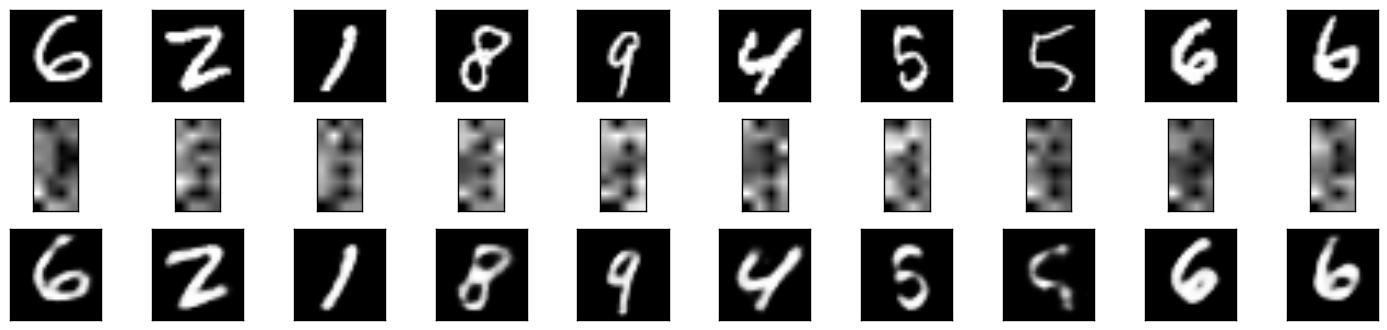

In [12]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [13]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)           0         
__________

In [14]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
Total para

In [15]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=3, mode='max')]
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                callbacks=my_callbacks,
                epochs=10,
                batch_size=256,
                validation_data=(x_test, x_test))

Train on 30000 samples, validate on 5000 samples
Epoch 1/10
30000/30000 [==============================] - 207s 7ms/step - loss: 0.3184 - acc: 0.7899 - val_loss: 0.1807 - val_acc: 0.7921
Epoch 2/10
30000/30000 [==============================] - 208s 7ms/step - loss: 0.1644 - acc: 0.7927 - val_loss: 0.1504 - val_acc: 0.8108
Epoch 3/10
30000/30000 [==============================] - 203s 7ms/step - loss: 0.1431 - acc: 0.8009 - val_loss: 0.1349 - val_acc: 0.8119
Epoch 4/10
30000/30000 [==============================] - 214s 7ms/step - loss: 0.1307 - acc: 0.8046 - val_loss: 0.1244 - val_acc: 0.8162
Epoch 5/10
30000/30000 [==============================] - 246s 8ms/step - loss: 0.1221 - acc: 0.8069 - val_loss: 0.1178 - val_acc: 0.8173
Epoch 6/10
30000/30000 [==============================] - 245s 8ms/step - loss: 0.1169 - acc: 0.8081 - val_loss: 0.1141 - val_acc: 0.8173
Epoch 7/10
30000/30000 [==============================] - 238s 8ms/step - loss: 0.1132 - acc: 0.8089 - val_loss: 0.1114 - v

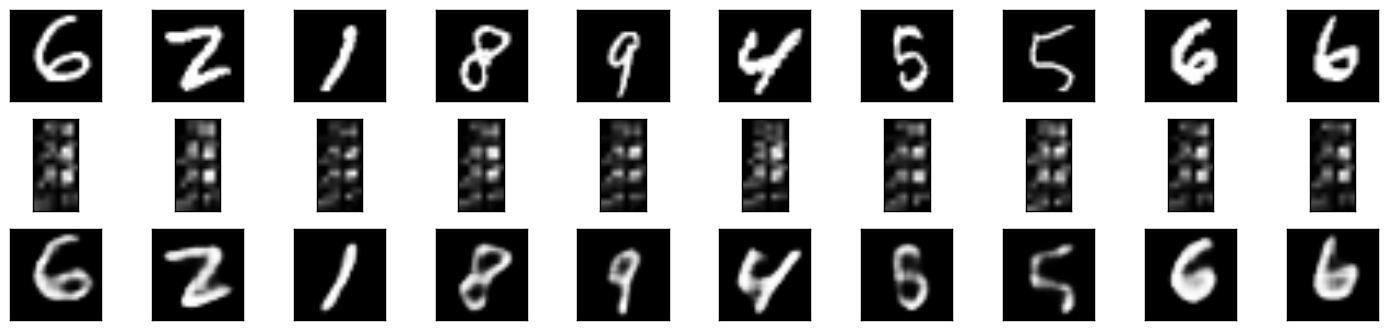

In [16]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()